In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("brainstroke.csv")

In [127]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [128]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [130]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


<AxesSubplot:>

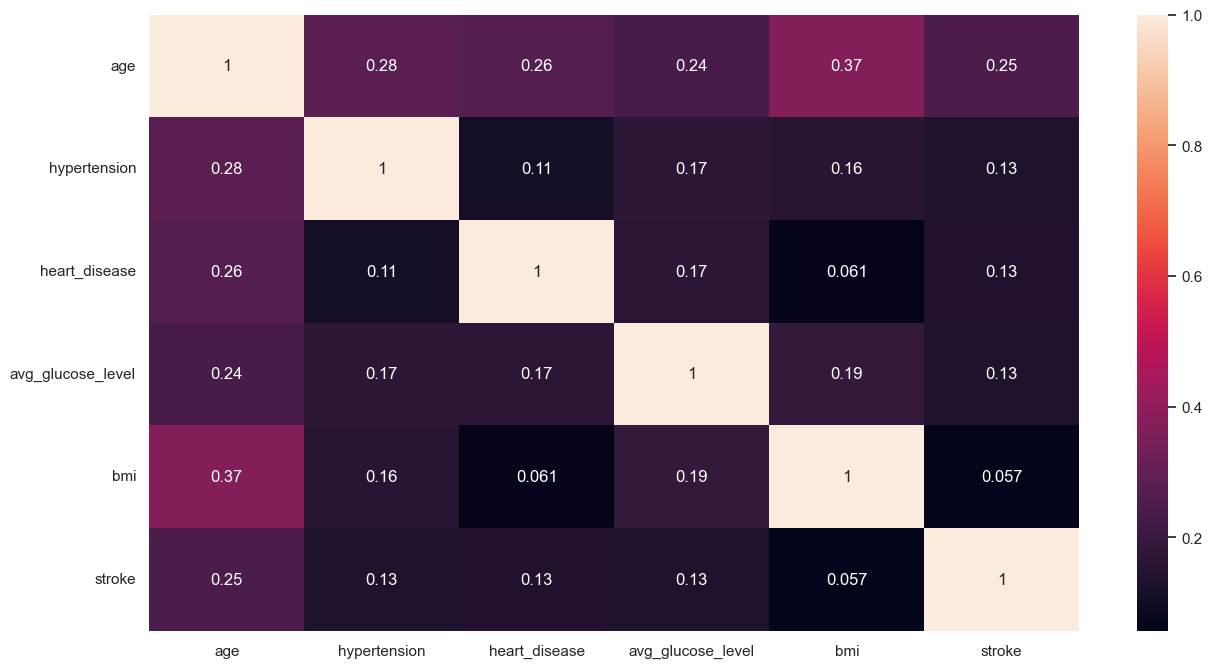

In [131]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [132]:
#dropar colunas que não serão utilizadas
df.drop(['ever_married','work_type','Residence_type'], axis = 1, inplace = True)
df = df.dropna()
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [133]:
from sklearn.preprocessing import OrdinalEncoder
#aplicar OrdinalEncoding nas colunas gender e smoking_status, visto que estão setadas como "objetos" e tendem a ter importância no resultado final.
#categorizamos os objetos destas colunas em ID's numéricos
ord_enc = OrdinalEncoder()
df["gender"] = ord_enc.fit_transform(df[["gender"]])
df["smoking_status"] = ord_enc.fit_transform(df[["smoking_status"]])

In [134]:
target = 'stroke'
x = df.loc[:,df.columns!=target]
y = df.loc[:,df.columns==target]

In [135]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status']
x = pd.get_dummies(x[columns])

0    4733
1     248
Name: stroke, dtype: int64


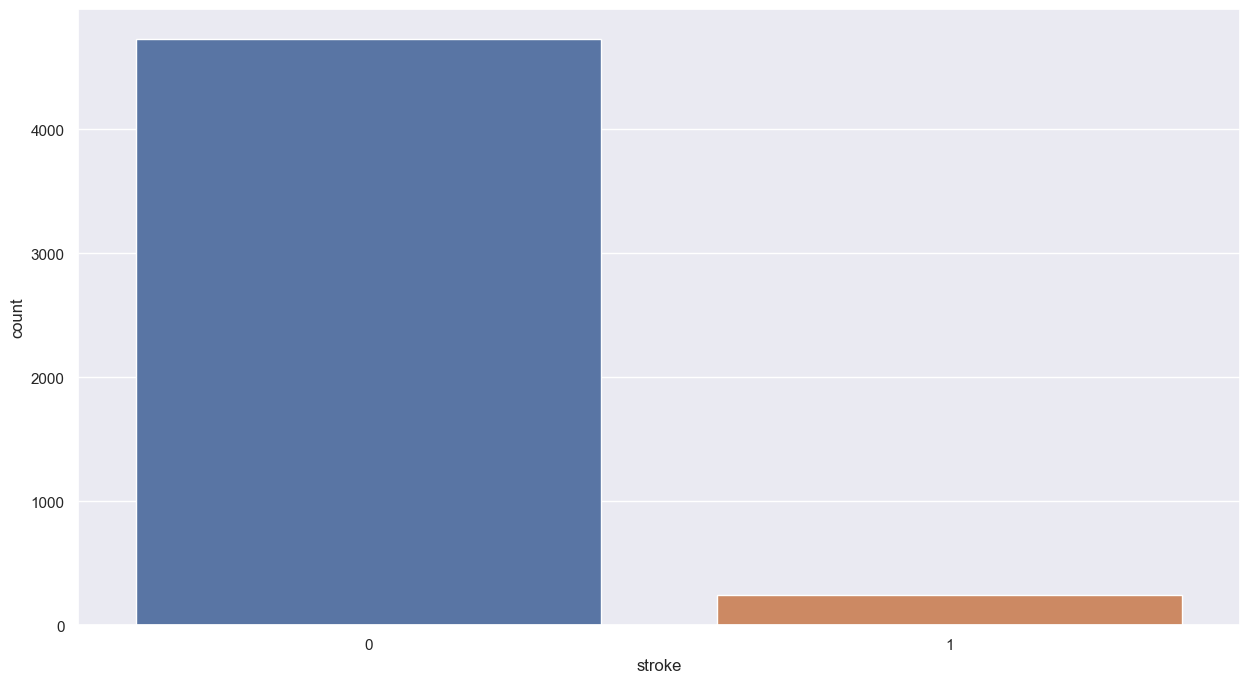

In [136]:
ax = sns.countplot(x=target,data=df)
print(df[target].value_counts())

Temos um Oversampling no Dataset, precisamos equializar os dados.

In [137]:
percentage_no_stroke = 100*(4733/float(df.shape[0]))
percentage_no_stroke

95.0210801043967

In [138]:
percentage_yes_stroke = 100*(248/float(df.shape[0]))
percentage_yes_stroke

4.978919895603292

In [139]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

1    4733
0    4733
Name: stroke, dtype: int64


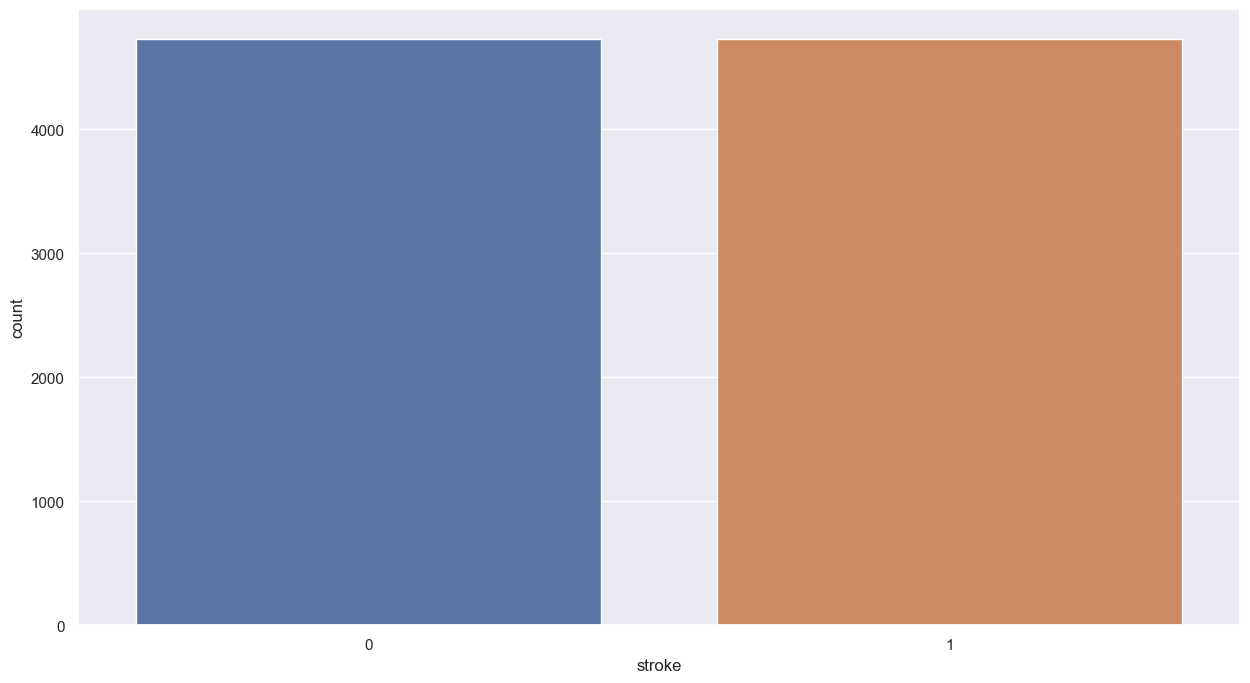

In [140]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [141]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,228.69,36.6,1.0,1
1,1.0,80.0,0,1,105.92,32.5,2.0,1
2,0.0,49.0,0,0,171.23,34.4,3.0,1
3,0.0,79.0,1,0,174.12,24.0,2.0,1
4,1.0,81.0,0,0,186.21,29.0,1.0,1


In [142]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   float64
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   float64
 7   stroke             4981 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 311.4 KB


In [143]:
# Definição dos imputs e do nosso objetivo
from sklearn.model_selection import GridSearchCV,train_test_split 

# dividimos os valores em variaveis de treino e teste com estado randômico de 25 e a porcentagem de 80% para treino e 20% para teste
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=25, test_size=0.20)
x_train.shape , x_test.shape,y_train.shape,y_test.shape #apresentação do "corpo" de cada variavel, meio que uma descrição do formato dos dados contidos nessa variavel

((7572, 7), (1894, 7), (7572, 1), (1894, 1))

Criando a Random Forest

In [144]:
# Iniciando a floresta e treinando o modelo
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=20, n_jobs=-1)
clf.fit(x_train, y_train)


C:\Users\gabri\AppData\Local\Temp\ipykernel_20220\2241089125.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=20)

In [145]:
# printando os resultados de treino e teste 
print (clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

1.0
0.9630411826821542


Modelo está overfitado, ou seja, o treino está "memorizando" os resultados  e com uma acurácia extremamente alta. Caracterizando o Overfiting

Encontrando parâmetros para a Random Forest

In [146]:
# alocando varios parâmetros para buscar qual o melhor
param_grid = {
    'n_estimators': np.linspace(2100, 2300, 5, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [147]:
# Retreino da floresta
rf_grid = RandomForestClassifier(criterion = 'entropy', bootstrap = True, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri encontrados anteriormente
grid_rf_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                        cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [ ]:
# Retornando os melhores parâmetros para serem utilizados.
best_rf_grid = grid_rf_search.best_estimator_
grid_rf_search.best_params_

{'max_depth': 190,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 2150}

In [ ]:
# printando novamente os resultados obtidos na floresta com os melhores parâmetros.
print(grid_rf_search.score(x_train, y_train))
print(grid_rf_search.score(x_test, y_test))

0.9933967247754887
0.9593453009503696


In [ ]:
# Fazendo uma previsão
# [gender,age,hypertension,heart_disease,glucose_level,bmi,smokes]
# gender = 1 male, 0 female
# age
# hypertension = 0 yes, 1 no
# heart_disease = 0 no, 1 yes
# glucose_leve
# bmi
# smokes = 1 formal, 2 never, 3 smokes e 4 unknow
row = [[1, 67, 0, 1, 228.69, 36.6, 1]]
y_trainhat = best_rf_grid.predict(row)
print('Classificação: %d' % y_trainhat[0])
if(y_trainhat == 0):
    print('Classificação: Paciente provavelmente não terá um Derrame')
if(y_trainhat == 1):
    print('Classificação: Paciente poderá ter um Derrame')

NameError: name 'best_rf_grid' is not defined

RETREINO COM PARAMETROS FIXADOS

In [ ]:
# Iniciando a floresta e treinando o modelo
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=20, n_jobs=-1)
clf.fit(x_train, y_train)

C:\Users\gabri\AppData\Local\Temp\ipykernel_20220\839473215.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=20)

In [ ]:
# Retreino da floresta
clf = RandomForestClassifier(criterion = 'entropy', bootstrap = True, n_jobs=-1)
#Inicialização da floresta com os valores do param_gri encontrados anteriormente
clf = RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=4, min_samples_leaf= 2, random_state=20, n_jobs=-1)
# Inicialização da floresta com os valores do param_gri encontrados anteriormente
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=10, n_jobs=-1, random_state=20)

In [ ]:
# Printando novamente os resultados obtidos na floresta com os melhores parâmetros.
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8328050713153724
0.8289334741288279


In [ ]:
clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=378518883),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1663920602),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1708167439),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1951685855),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1681611676),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_samples_split=4, random_state=1942519002),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                        min_s

In [ ]:
len(clf.estimators_)

10

In [ ]:
for i in range(len(clf.estimators_)):
   print(tree.export_text(clf.estimators_[i]))

|--- feature_6 <= 0.00
|   |--- feature_5 <= 26.01
|   |   |--- feature_5 <= 19.35
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  19.35
|   |   |   |--- class: 0.0
|   |--- feature_5 >  26.01
|   |   |--- feature_4 <= 205.22
|   |   |   |--- class: 0.0
|   |   |--- feature_4 >  205.22
|   |   |   |--- class: 1.0
|--- feature_6 >  0.00
|   |--- feature_0 <= 0.00
|   |   |--- feature_6 <= 1.00
|   |   |   |--- class: 1.0
|   |   |--- feature_6 >  1.00
|   |   |   |--- class: 0.0
|   |--- feature_0 >  0.00
|   |   |--- feature_1 <= 52.04
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  52.04
|   |   |   |--- class: 1.0

|--- feature_6 <= 0.00
|   |--- feature_4 <= 205.93
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_4 >  205.93
|   |   |--- feature_0 <= 0.99
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  0.99
|   |   |   |--- class: 0.0
|--- feature_6 >  0.00
|   |--- feature_0 <= 0

[Text(0.5, 0.875, 'X[6] <= 0.0\ngini = 0.5\nsamples = 4789\nvalue = [3777, 3795]'),
 Text(0.25, 0.625, 'X[4] <= 205.22\ngini = 0.278\nsamples = 871\nvalue = [1172, 235]'),
 Text(0.125, 0.375, 'X[1] <= 56.5\ngini = 0.224\nsamples = 812\nvalue = [1140, 168]'),
 Text(0.0625, 0.125, 'gini = 0.038\nsamples = 609\nvalue = [952, 19]'),
 Text(0.1875, 0.125, 'gini = 0.493\nsamples = 203\nvalue = [188, 149]'),
 Text(0.375, 0.375, 'X[4] <= 220.575\ngini = 0.438\nsamples = 59\nvalue = [32, 67]'),
 Text(0.3125, 0.125, 'gini = 0.258\nsamples = 49\nvalue = [12, 67]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [20, 0]'),
 Text(0.75, 0.625, 'X[0] <= 0.001\ngini = 0.488\nsamples = 3918\nvalue = [2605, 3560]'),
 Text(0.625, 0.375, 'X[1] <= 71.09\ngini = 0.491\nsamples = 1775\nvalue = [1593, 1221]'),
 Text(0.5625, 0.125, 'gini = 0.381\nsamples = 1178\nvalue = [1403, 483]'),
 Text(0.6875, 0.125, 'gini = 0.326\nsamples = 597\nvalue = [190, 738]'),
 Text(0.875, 0.375, 'X[0] <= 1.0\ngini = 0.422

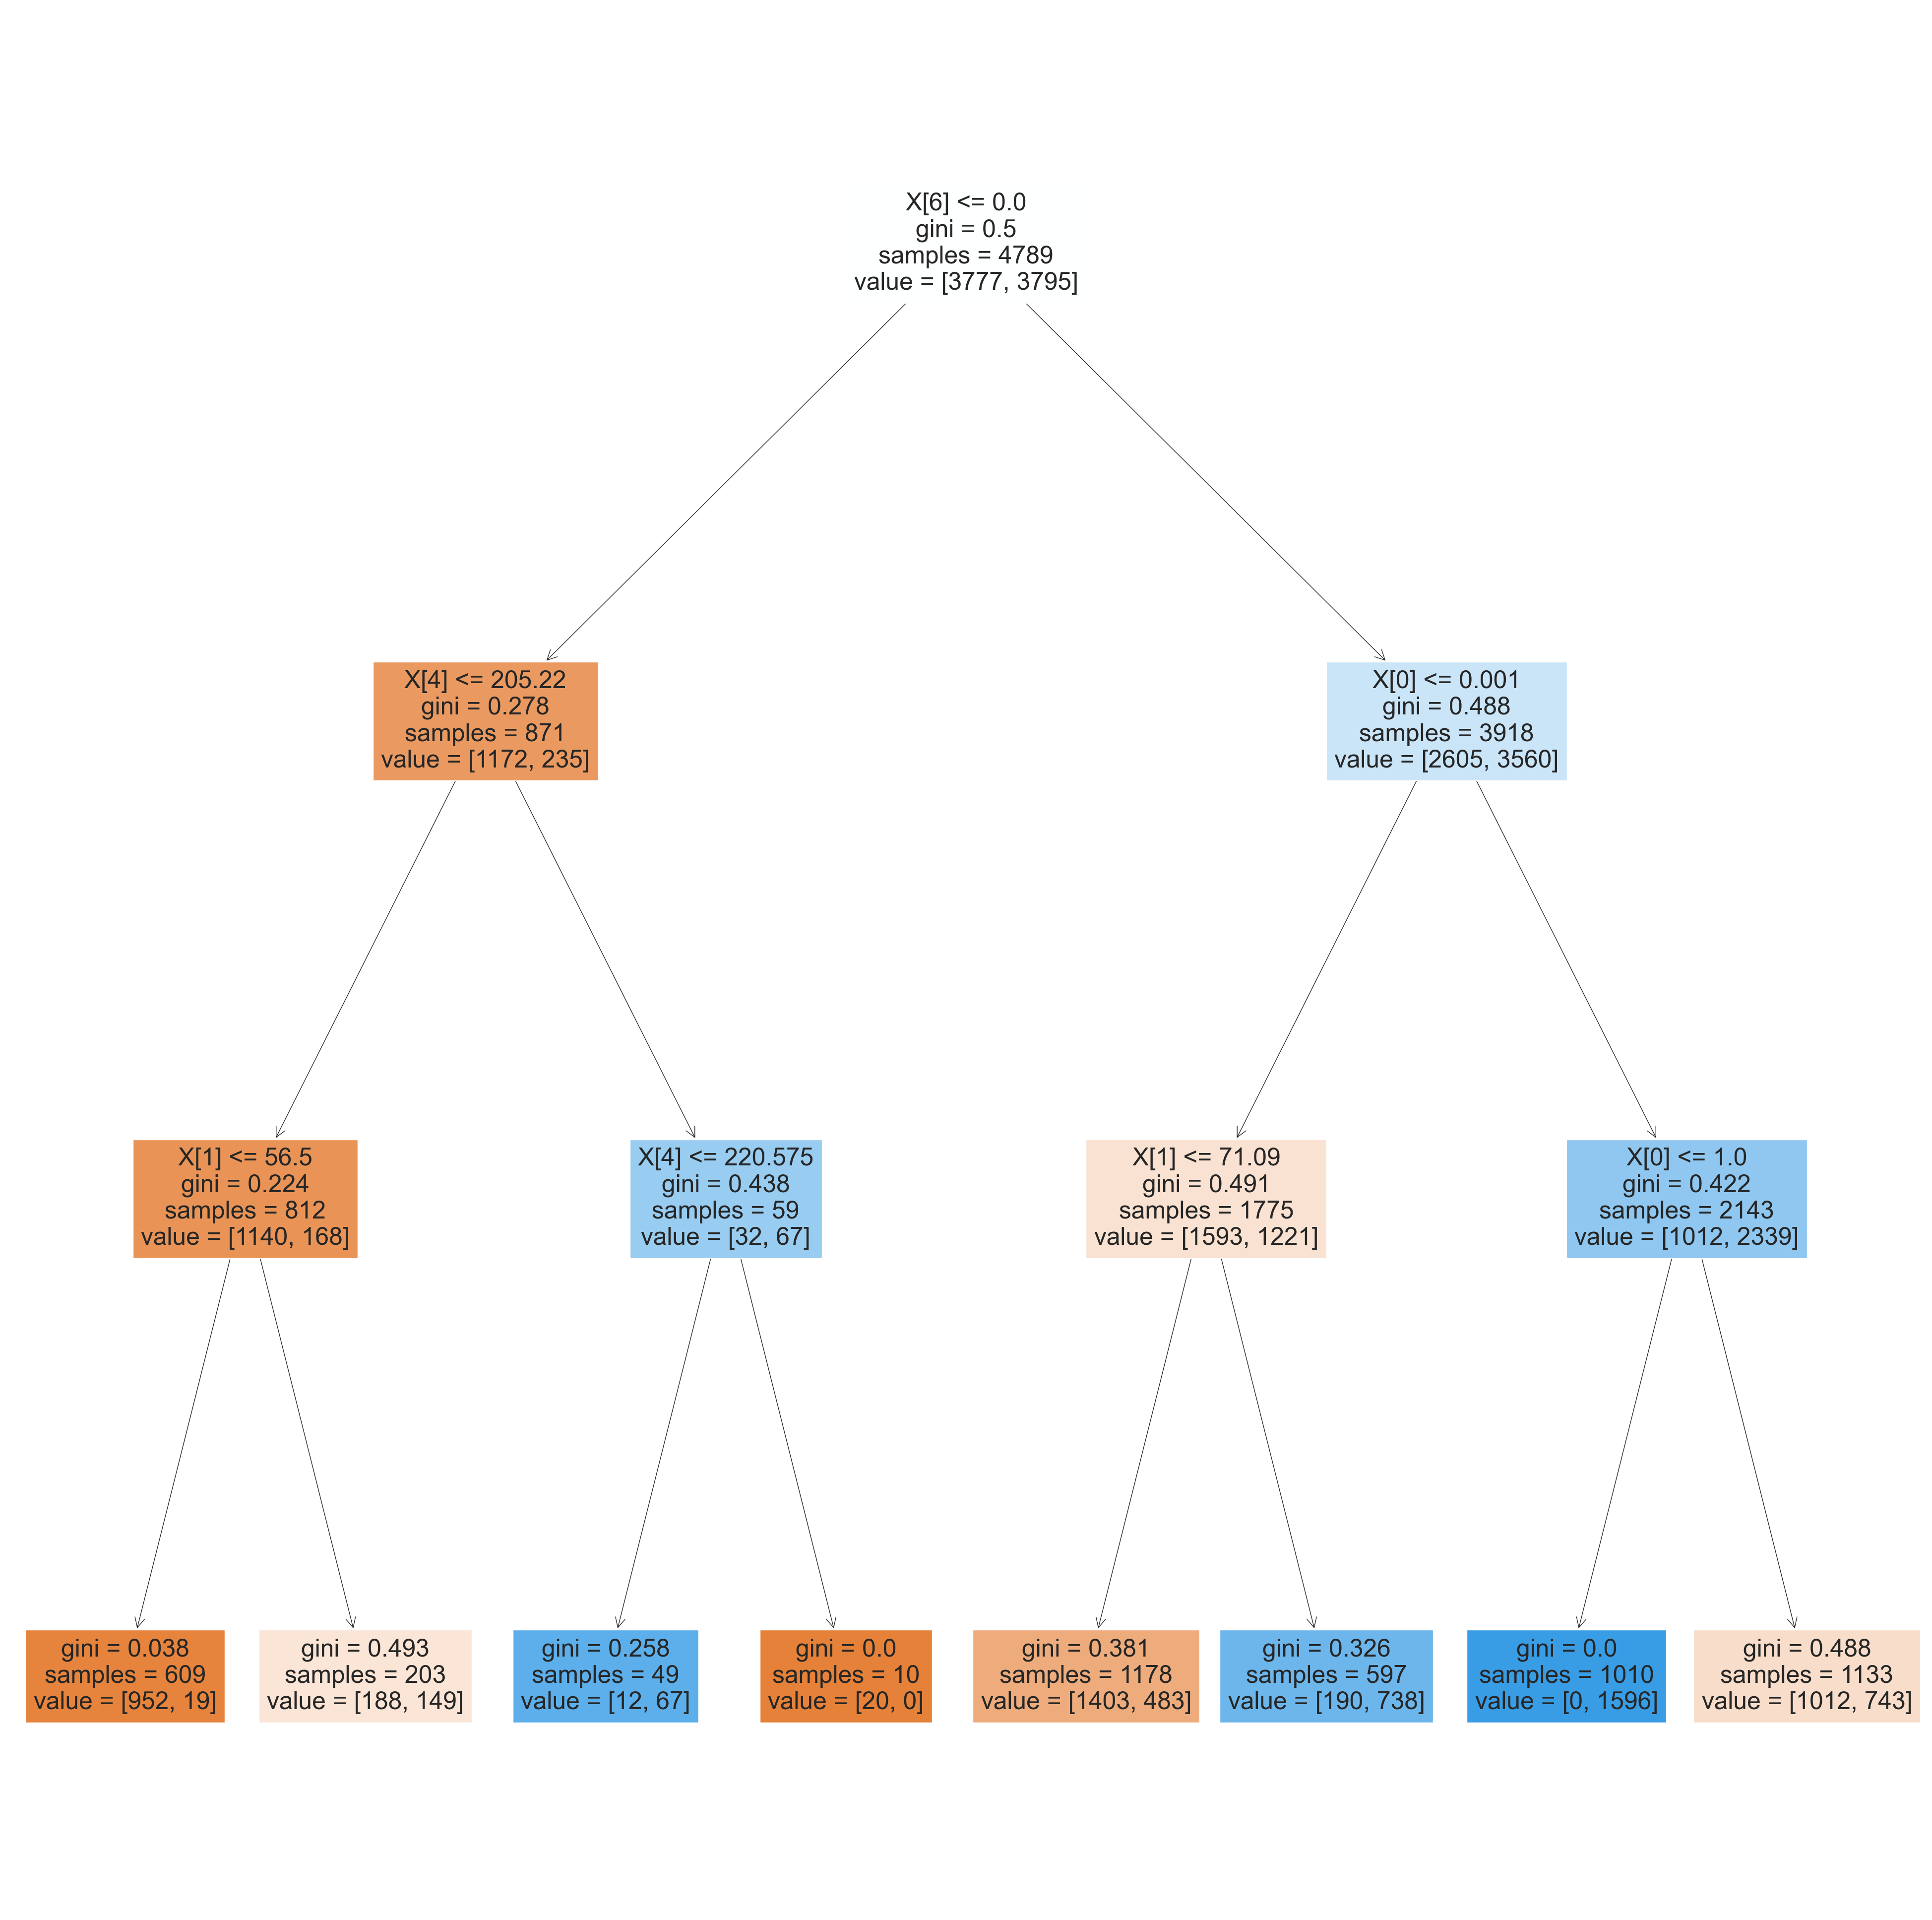

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(clf.estimators_[4],filled=True)

In [ ]:
# Fazendo uma previsão
# [gender,age,hypertension,heart_disease,glucose_level,bmi,smokes]
# gender = 1 male, 0 female
# age
# hypertension = 0 yes, 1 no
# heart_disease = 0 no, 1 yes
# glucose_leve
# bmi
# smokes = 1 formal, 2 never, 3 smokes e 4 unknow
row = [[1, 67, 0, 1, 228.69, 36.6, 1]]
y_trainhat = clf.predict(row)
print('Classificação: %d' % y_trainhat[0])
if(y_trainhat == 0):
    print('Classificação: Paciente provavelmente não terá um Derrame')
if(y_trainhat == 1):
    print('Classificação: Paciente poderá ter um Derrame')

Classificação: 1
Classificação: Paciente poderá ter um Derrame


c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
